# A Climatological Analysis of the Surface Drainage of the Amery Ice Shelf, East Antarctica

## Between summer air temperature amd summer sunniness, which is a larger control on the size of surface meltwater lakes? 

In [1]:
from dask.diagnostics import ProgressBar
import numpy as np
import datetime
from datetime import date
import xarray as xr
import dask.array as da
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

Text(0.5,0.7,'Melt Lakes on the Amery Ice Shelf, East Antarctica, Jan 13, 2017')

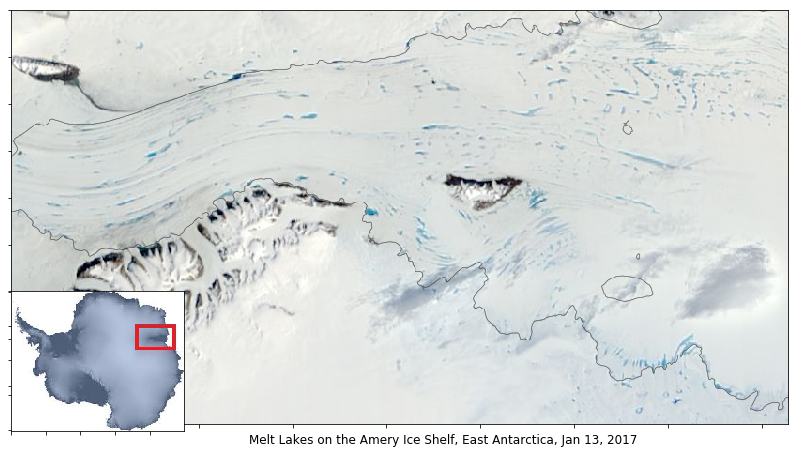

In [141]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0, 0, 0.9, 2])
ax2 = fig.add_axes([0, 0, 0.2, 1.6])
lakepicture = plt.imread('nasa-worldview_2017_01_13_1493062018.tif')
antarcticamap = plt.imread('simple_antarctica_wamery.jpg')
ax1.imshow(lakepicture)
ax1.set_xticklabels(labels=[],fontdict={'color':'w'})
ax1.set_yticklabels(labels=[],fontdict={'color':'w'})
ax2.set_xticklabels(labels=[],fontdict={'color':'w'})
ax2.set_yticklabels(labels=[],fontdict={'color':'w'})
ax2.imshow(antarcticamap)
fig.suptitle('Melt Lakes on the Amery Ice Shelf, East Antarctica, Jan 13, 2017', x=0.5,y=0.7)

## PATMOSx Cloud Data
### Cloud fraction data from PATMOSx satellite

In [13]:
ds = xr.open_dataset('http://www.ncei.noaa.gov/thredds/dodsC/avhrr-patmos-x-cloudprops-noaa-asc-fc/PATMOS-X_Cloud_Properties:_Aggregation,_NOAA_ascending_best.ncd')

In [14]:
cloud_fract = ds.cloud_fraction.sel(latitude=slice(-75,-65),longitude=slice(50,85),time=slice('1998-01-01','2017-06-30'))
coastlines = ds.land_class.sel(time='1998-01-01',latitude=slice(-75,-65),longitude=slice(50,85)).where('land_class'==2)

In [35]:
summer_cloudiness_1999 = cloud_fract.sel(time=slice(datetime.date(1998,12,1),datetime.date(1999,3,1))).mean(dim='time')
summer_cloudiness_2000 = cloud_fract.sel(time=slice(datetime.date(1999,12,1),datetime.date(2000,3,1))).mean(dim='time')
summer_cloudiness_2001 = cloud_fract.sel(time=slice(datetime.date(2000,12,1),datetime.date(2001,3,1))).mean(dim='time')
summer_cloudiness_2002 = cloud_fract.sel(time=slice(datetime.date(2001,12,1),datetime.date(2002,3,1))).mean(dim='time')
summer_cloudiness_2003 = cloud_fract.sel(time=slice(datetime.date(2002,12,1),datetime.date(2003,3,1))).mean(dim='time')
summer_cloudiness_2004 = cloud_fract.sel(time=slice(datetime.date(2003,12,1),datetime.date(2004,3,1))).mean(dim='time')
summer_cloudiness_2005 = cloud_fract.sel(time=slice(datetime.date(2004,12,1),datetime.date(2005,3,1))).mean(dim='time')
summer_cloudiness_2006 = cloud_fract.sel(time=slice(datetime.date(2005,12,1),datetime.date(2006,3,1))).mean(dim='time')
summer_cloudiness_2007 = cloud_fract.sel(time=slice(datetime.date(2006,12,1),datetime.date(2007,3,1))).mean(dim='time')
summer_cloudiness_2008 = cloud_fract.sel(time=slice(datetime.date(2007,12,1),datetime.date(2008,3,1))).mean(dim='time')
summer_cloudiness_2009 = cloud_fract.sel(time=slice(datetime.date(2008,12,1),datetime.date(2009,3,1))).mean(dim='time')
summer_cloudiness_2010 = cloud_fract.sel(time=slice(datetime.date(2009,12,1),datetime.date(2010,3,1))).mean(dim='time')
summer_cloudiness_2011 = cloud_fract.sel(time=slice(datetime.date(2010,12,1),datetime.date(2011,3,1))).mean(dim='time')
summer_cloudiness_2012 = cloud_fract.sel(time=slice(datetime.date(2011,12,1),datetime.date(2012,3,1))).mean(dim='time')
summer_cloudiness_2013 = cloud_fract.sel(time=slice(datetime.date(2012,12,1),datetime.date(2013,3,1))).mean(dim='time')
summer_cloudiness_2014 = cloud_fract.sel(time=slice(datetime.date(2013,12,1),datetime.date(2014,3,1))).mean(dim='time')
summer_cloudiness_2015 = cloud_fract.sel(time=slice(datetime.date(2014,12,1),datetime.date(2015,3,1))).mean(dim='time')
summer_cloudiness_2016 = cloud_fract.sel(time=slice(datetime.date(2015,12,1),datetime.date(2016,3,1))).mean(dim='time')
summer_cloudiness_2017 = cloud_fract.sel(time=slice(datetime.date(2016,12,1),datetime.date(2017,3,1))).mean(dim='time')


In [36]:
summer_cloudiness = xr.concat([summer_cloudiness_1999,summer_cloudiness_2000,summer_cloudiness_2001,summer_cloudiness_2003,
                              summer_cloudiness_2004,summer_cloudiness_2005,summer_cloudiness_2006,summer_cloudiness_2007,
                             summer_cloudiness_2008,summer_cloudiness_2009,summer_cloudiness_2010,summer_cloudiness_2011,
                             summer_cloudiness_2012,summer_cloudiness_2013,summer_cloudiness_2014,summer_cloudiness_2015,
                             summer_cloudiness_2016,summer_cloudiness_2017],dim='time')

In [41]:
summer_cloudiness.to_netcdf('summer_cloudiness2','w')

In [42]:
summer_cloudiness = xr.open_dataset('summer_cloudiness2')
summer_cloudiness

<xarray.Dataset>
Dimensions:         (latitude: 100, longitude: 350, time: 18)
Coordinates:
  * latitude        (latitude) float32 -74.94827 -74.84939 -74.747765 ...
  * longitude       (longitude) float32 50.049744 50.148624 50.247505 ...
Dimensions without coordinates: time
Data variables:
    cloud_fraction  (time, latitude, longitude) float32 ...

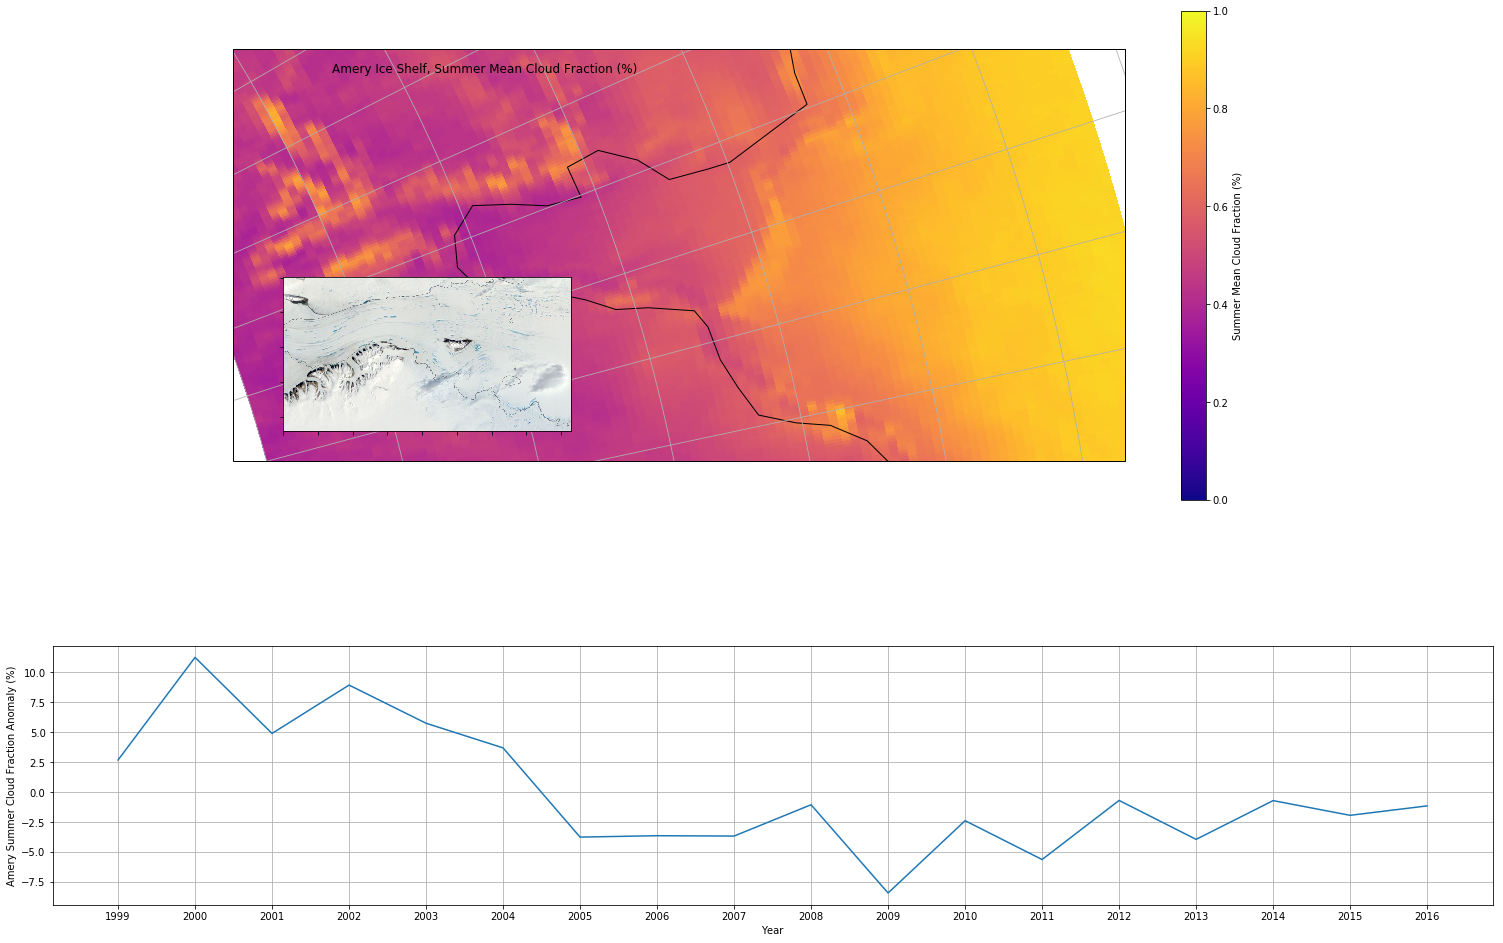

In [358]:
%matplotlib inline
years = np.arange(1999,2017)
figure = plt.figure(figsize=(20, 9))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([70, 75, -75, -65], ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
summerplot = summer_cloudiness.cloud_fraction.mean(dim='time').plot(ax=ax,vmin=0,vmax=1,transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={'label':'Summer Mean Cloud Fraction (%)'},
                                                                   cmap='plasma')
ax2 = figure.add_axes([0.16, 0, 0.2, 0.7])
ax2.imshow(lakepicture)
ax2.set_xticklabels(labels=[],fontdict={'color':'w'})
ax2.set_yticklabels(labels=[],fontdict={'color':'w'})
figure.suptitle('Amery Ice Shelf, Summer Mean Cloud Fraction (%)',y=0.8, x=.3);


years = np.arange(1999,2017)
ax3 = figure.add_axes([0,-.5,1,0.4])
anomalyplot = 100*(summer_cloudiness.cloud_fraction.mean(dim=['latitude','longitude'])
                - summer_cloudiness.cloud_fraction.mean(dim=['latitude','longitude']).mean('time'))
#ax.set_xticklabels(summer_cloudiness.time.values+1999)
anomalycloudiness = pd.Series(anomalyplot.data.tolist(), index=years)
anomalycloudiness.plot(grid=True,xticks=years, ax=ax3)
ax3.set_ylabel('Amery Summer Cloud Fraction Anomaly (%)')
ax3.set_xlabel('Year');


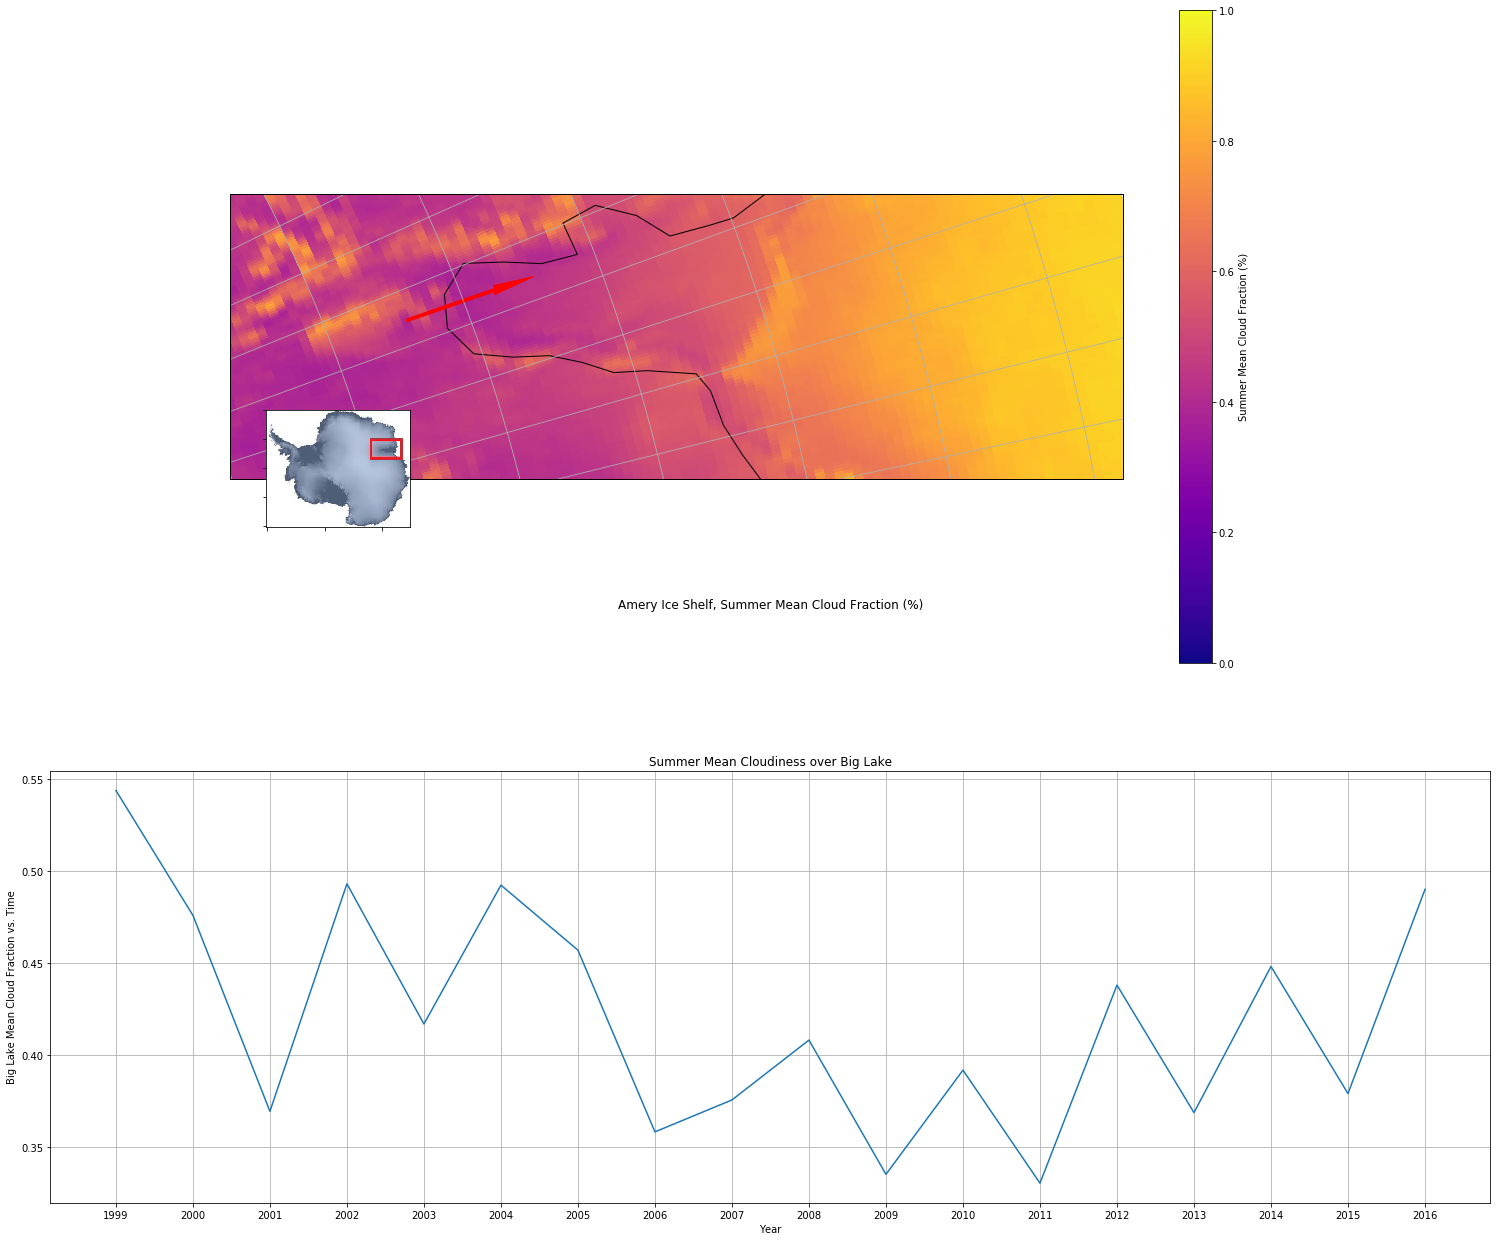

In [183]:
figure = plt.figure(figsize=(20, 12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([72.5, 72.7, -75, -65], ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
summerplot = summer_cloudiness.cloud_fraction.mean(dim='time').plot(ax=ax,vmin=0,vmax=1,transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={'label':'Summer Mean Cloud Fraction (%)'},
                                                                   cmap='plasma')
ax.arrow(x= 69.19-.1, y=-71.64953-1,dx=.1,dy=1, transform=ccrs.PlateCarree(),color='r',width=0.1,)

ax2 = figure.add_axes([0.15, 0, 0.1, 0.7])
ax2.imshow(antarcticamap)
ax2.set_xticklabels(labels=[],fontdict={'color':'w'})
ax2.set_yticklabels(labels=[],fontdict={'color':'w'})
figure.suptitle('Amery Ice Shelf, Summer Mean Cloud Fraction (%)',y=0.2);

ax3 = figure.add_axes([0,-.5,1,0.5])
ax3.set_ylabel('Big Lake Mean Cloud Fraction vs. Time')
ax3.set_xlabel('Year');

BigLake_list = summer_cloudiness.sel(latitude=slice(-71.64953,-71.5),longitude=slice(69.19,69.25)).mean(dim='latitude')
BigLake_summercloudiness = pd.DataFrame({'cloudiness':BigLake_list.cloud_fraction.values.squeeze()}, index=years)
BigLake_summercloudiness.plot(grid=True, xticks=years, ax=ax3,
                              legend=False,title = 'Summer Mean Cloudiness over Big Lake')

## AWS Temperature Data from Amery G3 AWS

In [1]:
! wget http://aws.acecrc.org.au/data/AmeryG3_antarctic_aws_1999_2017.nc

--2018-11-12 19:51:01--  http://aws.acecrc.org.au/data/AmeryG3_antarctic_aws_1999_2017.nc
Resolving aws.acecrc.org.au (aws.acecrc.org.au)... 144.6.226.118
Connecting to aws.acecrc.org.au (aws.acecrc.org.au)|144.6.226.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9260468 (8.8M) [application/x-netcdf]
Saving to: ‘AmeryG3_antarctic_aws_1999_2017.nc.1’

AmeryG3_antarctic_a 100%[===================>]   8.83M  4.30MB/s    in 2.1s    

2018-11-12 19:51:04 (4.30 MB/s) - ‘AmeryG3_antarctic_aws_1999_2017.nc.1’ saved [9260468/9260468]



In [292]:
import xarray as xr
import pandas as pd
import numpy as np
AmeryAWS = xr.open_dataset('AmeryG3_antarctic_aws_1999_2017.nc')
AmeryAWS.Time
AmeryAWS = AmeryAWS.swap_dims({'time':'Time'})


In [379]:
AiT4 = AmeryAWS.AiT4
AiT1 = AmeryAWS.AiT1
WVM = AmeryAWS.WVM


#fig, ax = plt.subplots(nrows=2)
#AiT4.sel(Time=slice(datetime.datetime(2017,1,1), datetime.datetime(2017,6,30))).plot(ax=ax[0])
#WVM.plot(ax=ax[1])
#fig.tight_layout()

In [309]:
temperature_compare = xr.merge([AiT1,AiT4, WVM],'no_conflicts')
summers = temperature_compare.where(temperature_compare.Time.dt.season=='DJF')

#Because the austral summer straddles the year division, the temperature data needs to be re-indexed so that 
#the austral summer is contained within the same year.

import datetime
summer_reindexed = summers.shift(Time=-90)

In [399]:
summer_AiT4_anom = (summer_reindexed.AiT4.resample('1Y', dim='Time') 
                    - summer_reindexed.AiT4.resample('1Y', dim='Time').mean(dim='Time'))
summer_AiT4_anom = pd.DataFrame(data={'summer_anom':summer_AiT4_anom.values}, index = summer_AiT4_anom.Time.dt.year)
summer_AiT4_anom.rename_axis('years')

summer_AiT4_PDD = summer_reindexed.AiT4.where(summer_reindexed.AiT4>0).groupby(summer_reindexed.Time.dt.year).count()
summer_PDD = pd.DataFrame(data = {'Positive_Degree_Days': summer_AiT4_PDD}, index = summer_AiT4_PDD.year)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(Time="1Y").mean('Time') 
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(Time="1Y").mean('Time') 
  


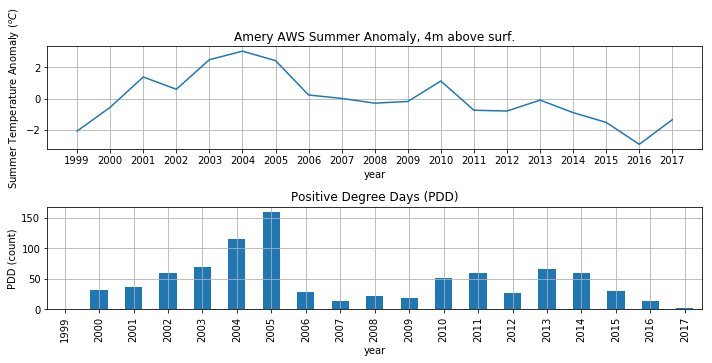

In [393]:
figure, ax = plt.subplots(nrows=2, figsize=(10,5))
summer_AiT4_anom.plot(ax=ax[0], grid=True, xticks = summer_AiT4_anom.index, title='Amery AWS Summer Anomaly, 4m above surf.',
                     legend=False)
ax[0].set_ylabel('Summer Temperature Anomaly ($^oC$)');
summer_PDD.plot.bar(ax=ax[1], grid=True, xticks = summer_PDD.index, title = 'Positive Degree Days (PDD)',
               legend=False)
ax[1].set_ylabel('PDD (count)');
figure.tight_layout()

## Amery Lakes

In [155]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt

Text(0,0.5,'Surface Area (m$^2$)')

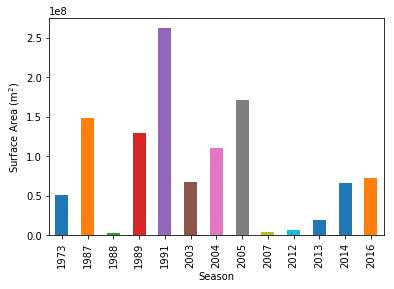

In [170]:
years= [1973,1987,1988,1989,1991,2003,2004,2005,2007,2012,2013,2014,2016]
biglakegeometry =pd.DataFrame(data={'years':[1973,1987,1988,1989,1991,2003,2004,2005,2007,2012,2013,2014,2016],
                              'BLarea': [50485500,148802000,3467700,129943000,262175616,67428000,110199000,171816000
                                         ,3839400,6787554,19089900,66546000,71992800]},index=years)
ax = plt.subplot()
biglakegeometry.BLarea.plot.bar(ax=ax)
ax.set_xlabel('Season')
ax.set_ylabel('Surface Area (m$^2$)')

In [179]:
BLarea = pd.DataFrame(data= biglakegeometry.BLarea, index=biglakegeometry.years)


## Amery Lake Mask Shapefiles

In [2]:
import shapefile
import os

In [5]:
shapefile_list_shp.pop('persistence_binary')

TypeError: 'str' object cannot be interpreted as an integer

In [3]:
shapefile_list = os.listdir()
shapefile_list_shp = []
for indx in np.arange(0, len(shapefile_list)):
    extension = shapefile_list[indx][-4:]
    if extension=='.shp':
        shapefile_list_shp.append(shapefile_list[indx][:-4])
        

In [236]:
os.chdir('lakemask_shapes/')

In [237]:
year_list = [2005,2004,2017,2010,2006,2014,2003,2016,2015,1989,2011]
year_list = year_list - np.ones_like(year_list)
year_list

array([2004, 2003, 2016, 2009, 2005, 2013, 2002, 2015, 2014, 1988, 2010])

In [238]:
def PolygonArea(corners):
    n = len(corners)
    area = 0.0
    for i in range(n):
        j = (i + 1) % n
        area += corners[i][0] * corners[j][1]
        area -= corners[j][0] * corners[i][1]
    area = abs(area) / 2.0
    return area

def haversine(coord1: object, coord2: object):
    import math

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    lon1, lat1 = coord1
    lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)
    return km


count = 0
area_sum = {}
areal_extent = {}
for shapefiles in shapefile_list_shp:
    a_shapefile = shapefile.Reader(shapefiles)
    a_shapefiles_shp = a_shapefile.shapes()
    polygon_area={}
    extent_ul = {}
    extent_lr = {}
    for indx in np.arange(0,len(a_shapefile)):
        polygon_area[indx] = PolygonArea(a_shapefiles_shp[indx].points)*111.69*111.66 #km/deg lat * km/deg lon near 80S
        extent_ul[indx] = [a_shapefiles_shp[indx].bbox[0],a_shapefiles_shp[indx].bbox[1]]
        extent_lr[indx] = [a_shapefiles_shp[indx].bbox[2],a_shapefiles_shp[indx].bbox[3]]
    
    year = year_list[count]
    area_sum[year] = sum(polygon_area.values())
    areal_extent[year] = haversine(min(extent_ul.values()),max(extent_lr.values()))
    count=count+1

In [256]:
AmeryLakes = pd.DataFrame(data= {'summed_area':list(area_sum.values()),
                                'areal_extent':list(areal_extent.values())},
                          index = year_list)
AmeryLakes = AmeryLakes.sort_index()

Text(0,0.5,'Percent Area Observed Lakes/Total Area (%)')

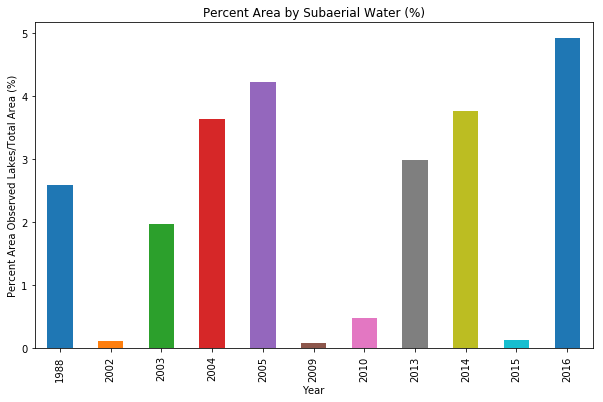

In [279]:
fig, ax = plt.subplots(figsize=(10,6))

total_area = 54516.221436 #measured total area of Amery Ice Shelf

(100*AmeryLakes.summed_area/total_area).plot.bar(ax=ax, title='Percent Area by Subaerial Water (%)')
ax.set_xlabel('Year')
ax.set_ylabel('Percent Area Observed Lakes/Total Area (%)')

Text(0,0.5,'Areal Extent of Subaerial Water (km)')

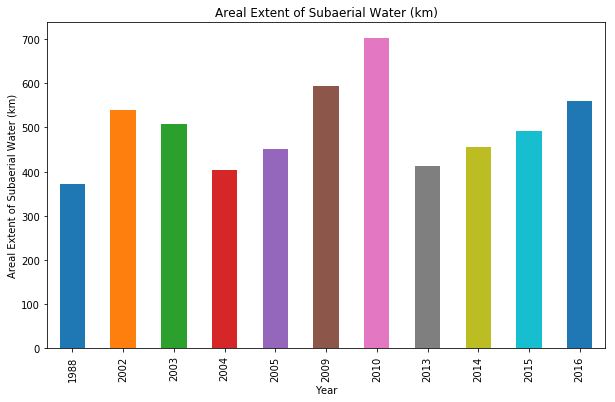

In [282]:
fig, ax = plt.subplots(figsize=(10,6))

AmeryLakes.areal_extent.plot.bar(ax=ax, title='Areal Extent of Subaerial Water (km)')
ax.set_xlabel('Year')
ax.set_ylabel('Areal Extent of Subaerial Water (km)')



## Comparison between temperature and lakes areas

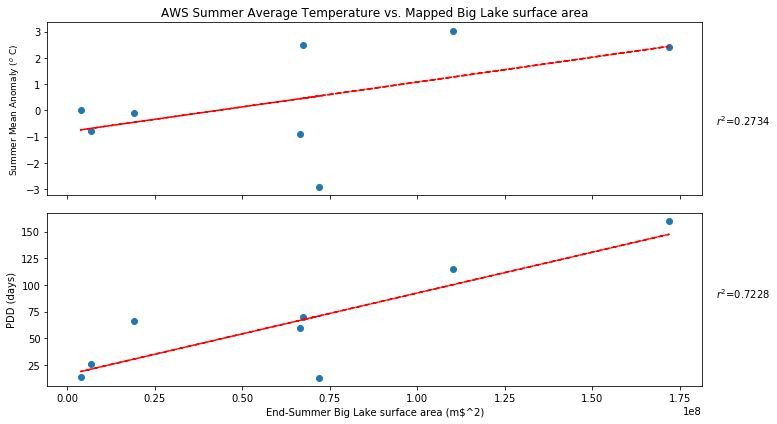

In [458]:
lakesize_temperature= pd.merge(BLarea,summer_AiT4_anom,left_on=BLarea.index,right_on=summer_AiT4_anom.index)
lakesize_PDD = pd.merge(BLarea,summer_PDD,left_on=BLarea.index,right_on=summer_PDD.index)
fig, ax = plt.subplots(figsize=(10,6),nrows=2,sharex=True)
ax[0].scatter(x=lakesize_temperature.BLarea, y=lakesize_temperature.summer_anom)
ax[0].set_ylabel('Summer Mean Anomaly ($^o$ C)', fontsize=9)
ax[0].set_title('AWS Summer Average Temperature vs. Mapped Big Lake surface area');
z_1 = np.polyfit(lakesize_temperature.BLarea, lakesize_temperature.summer_anom, 1)
p_1 = np.poly1d(z_1)
ax[0].plot(lakesize_temperature.BLarea,p(lakesize_temperature.BLarea),"r--")
corrcoeff = (np.corrcoef(lakesize_temperature.BLarea, lakesize_temperature.summer_anom)[0,1])**2
fig.text(1,0.7,'$r^2$=' + str(np.round(corrcoeff,4)))

ax[1].scatter(x=lakesize_PDD.BLarea, y=lakesize_PDD.Positive_Degree_Days)
ax[1].set_xlabel('End-Summer Big Lake surface area (m$^2)')
ax[1].set_ylabel('PDD (days)')
corrcoeff = (np.corrcoef(lakesize_PDD.BLarea, lakesize_PDD.Positive_Degree_Days)[0,1])**2
fig.text(1,.3,'$r^2$=' + str(np.round(corrcoeff,4)))
z_2 = np.polyfit(lakesize_temperature.BLarea, lakesize_PDD.Positive_Degree_Days, 1)
p_2 = np.poly1d(z_2)
ax[1].plot(lakesize_temperature.BLarea,p_2(lakesize_temperature.BLarea),"r--")

fig.tight_layout()

### Mean Cloud Fraction and Lake Size

In [184]:
BigLake_summercloudiness_xr = xr.Dataset(BigLake_summercloudiness)
lakesize_cloudiness= pd.merge(BLarea,BigLake_summercloudiness,left_on=BLarea.index,right_on=BigLake_summercloudiness.index)
lakesize_cloudiness

,key_0,BLarea,cloudiness
0,2003,67428000,0.416981
1,2004,110199000,0.492472
2,2005,171816000,0.457126
3,2007,3839400,0.375706
4,2012,6787554,0.438133
5,2013,19089900,0.368802
6,2014,66546000,0.448257
7,2016,71992800,0.490179


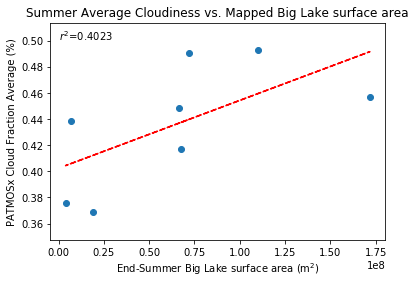

In [475]:
fig, ax = plt.subplots()
ax.scatter(x=lakesize_cloudiness.BLarea, y=lakesize_cloudiness.cloudiness)
corrcoeff = (np.corrcoef(lakesize_cloudiness.BLarea, lakesize_cloudiness.cloudiness)[0,1])**2
ax.text(0.5,0.5,'$r^2$=' + str(np.round(corrcoeff,4)))
z = np.polyfit(lakesize_cloudiness.BLarea, lakesize_cloudiness.cloudiness, 1)
p_3 = np.poly1d(z)
ax.plot(lakesize_cloudiness.BLarea,p_3(lakesize_cloudiness.BLarea),"r--")

ax.set_xlabel('End-Summer Big Lake surface area (m$^2$)')
ax.set_ylabel('PATMOSx Cloud Fraction Average (%)')
ax.set_title('Summer Average Cloudiness vs. Mapped Big Lake surface area');